<a href="https://colab.research.google.com/github/holmon-alp/diagnosis-of-diabetes/blob/main/Diagnosis_of_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We build a model that predicts whether women over 21 have diabetes.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Analytical approach to data

In [57]:
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [58]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

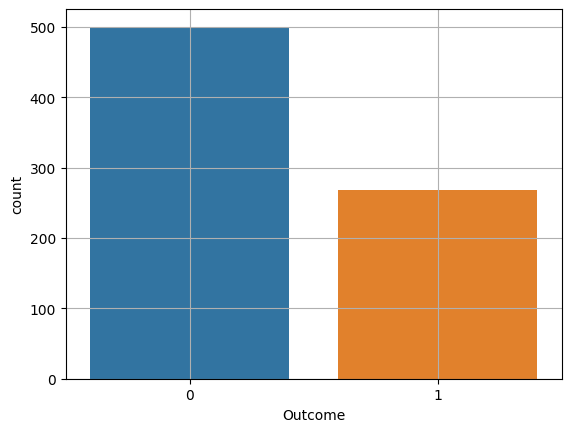

In [61]:
sns.countplot(diabetes_data, x="Outcome")
plt.grid()
plt.show()

#### Balancing

In [85]:


# df_majority = diabetes_data[diabetes_data['Outcome'] == 0]
# df_minority = diabetes_data[diabetes_data['Outcome'] == 1]
# df_majority = df_majority.sample(268)
# df_balanced = pd.concat([df_minority, df_majority])
# df_balanced.shape

data = diabetes_data.copy()

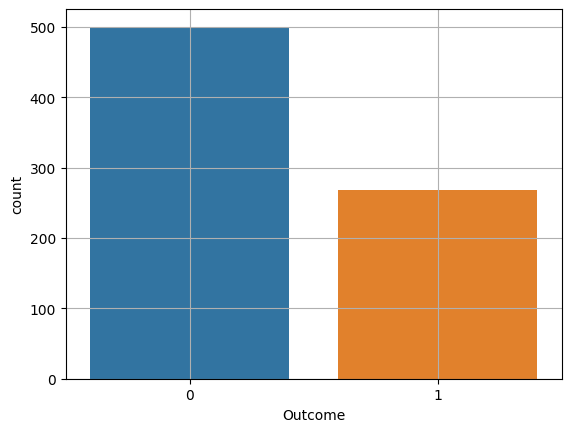

In [86]:
sns.countplot(data, x="Outcome")
plt.grid()
plt.show()

### Korrelatsiya

In [87]:
corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [88]:
data.corrwith(data['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

#### We discard unnecessary columns and divide the data into two parts

In [89]:
X = data[["Glucose", "BMI", "Age", "Pregnancies"]]
Y = data["Outcome"].copy()

#### Standartization and spliting

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=15)

# KNN model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(n_neighbors=3)

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)

knn_gscv.fit(X, Y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [69]:
knn_gscv.best_score_

0.774849333672863

In [70]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [71]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 19, 17, 20, 18, 16, 15,  9,  7,  4,  2, 10,  3,  1,
        5,  8, 11, 14, 12,  6, 13], dtype=int32)

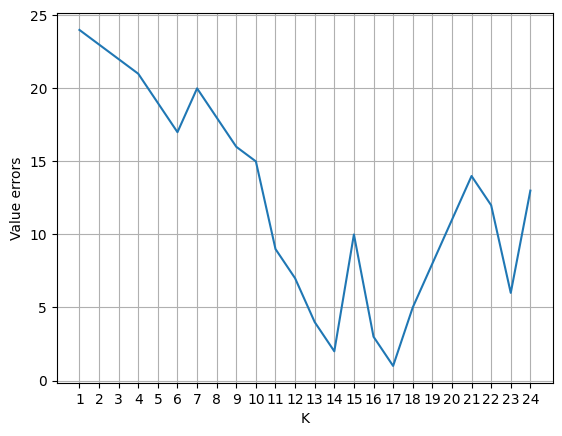

In [72]:
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid["n_neighbors"])
plt.grid()
plt.xlabel("K")
plt.ylabel("Value errors")
plt.show()

In [73]:
best_k = knn_gscv.best_params_['n_neighbors']
best_k

17

### Retrain model with best ***k***

In [74]:
knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

### Testing model - KNN

Accuracy score: 0.75
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        83
           1       0.56      0.61      0.58        33

    accuracy                           0.75       116
   macro avg       0.70      0.71      0.70       116
weighted avg       0.76      0.75      0.75       116



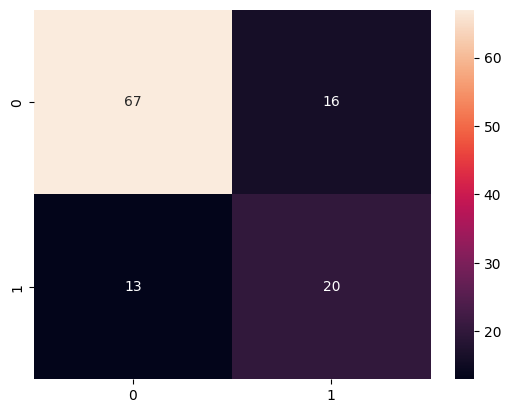

In [91]:
y_predict = knn_model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

# Keras model

In [92]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

ks_model = Sequential()
ks_model.add(Dense(units=1, activation="sigmoid"))

ks_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

ks_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 1s 3ms/step - loss: 0.8605 - accuracy: 0.4064
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.8448 - accuracy: 0.4187
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.8296 - accuracy: 0.4325
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 0.8146 - accuracy: 0.4433
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.4601
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.4816
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.4969
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.5123
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.5307
Epoch 10/10
21/21 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.5491


### Testing model - Keras

In [96]:
print(
  "Accuracy score:",
  ks_model.evaluate(X_test, y_test)[1]
)

4/4 [==============================] - 0s 4ms/step - loss: 0.7374 - accuracy: 0.5690
Accuracy score: 0.568965494632721


# Decision tree

Accuracy score: 0.6896551724137931
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        83
           1       0.47      0.64      0.54        33

    accuracy                           0.69       116
   macro avg       0.65      0.67      0.65       116
weighted avg       0.73      0.69      0.70       116



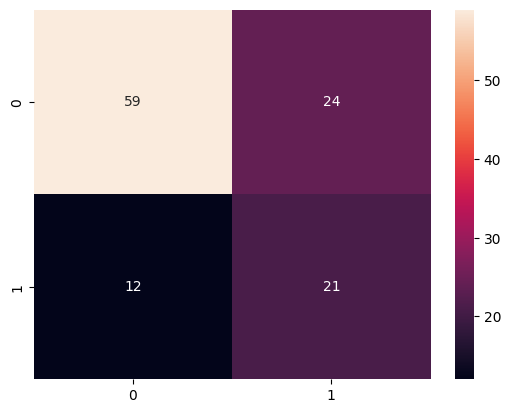

In [97]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)


y_pred = DT_model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

# Random Forest

Accuracy score: 0.7586206896551724
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        83
           1       0.57      0.64      0.60        33

    accuracy                           0.76       116
   macro avg       0.71      0.72      0.71       116
weighted avg       0.77      0.76      0.76       116



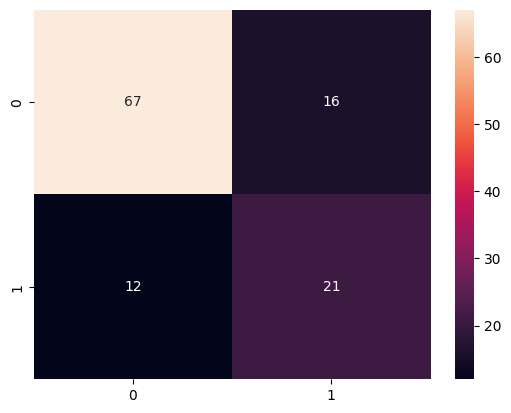

In [98]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
